importation des modul nessaisair

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler



lien vers notre dataset:https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope

on va lire notre data :

In [9]:
pd.read_csv("magic04.data")

,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.011,-8.2027,40.092,81.8828,g
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,g
...,...,...,...,...,...,...,...,...,...,...,...
19014,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19015,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19016,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19017,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


dans le tableau si dussou ona les non de tableau naparaisse pas danc on les ajoute :

In [10]:
cols=["fLenght","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]

df=pd.read_csv("magic04.data",names=cols)
df.head()

,fLenght,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [11]:
df["class"].unique()


array(['g', 'h'], dtype=object)

dans la class nous remarqon qon deux class pour bien manipuler notre data on va convertir les class a des nombre


In [12]:
df["class"]=(df["class"]== "g").astype(int)

df["class"].unique()

array([1, 0])

on voit maintenat les class qona:


array([0])

On vas visualise ces donne de chaque colone :

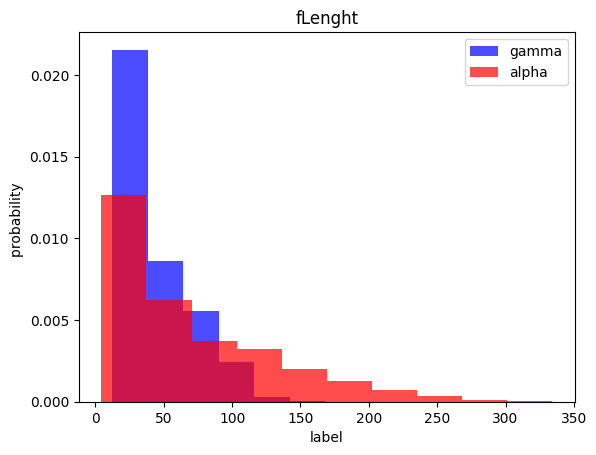

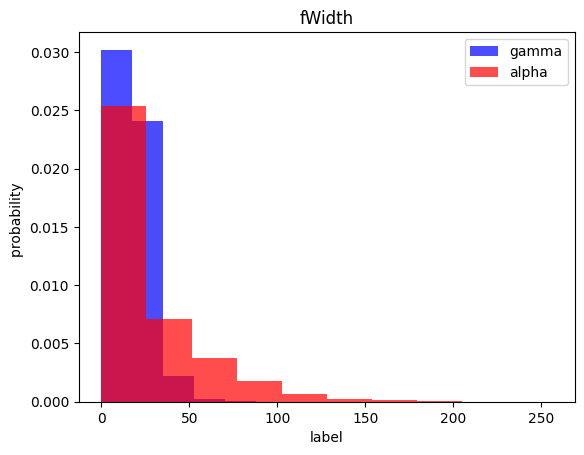

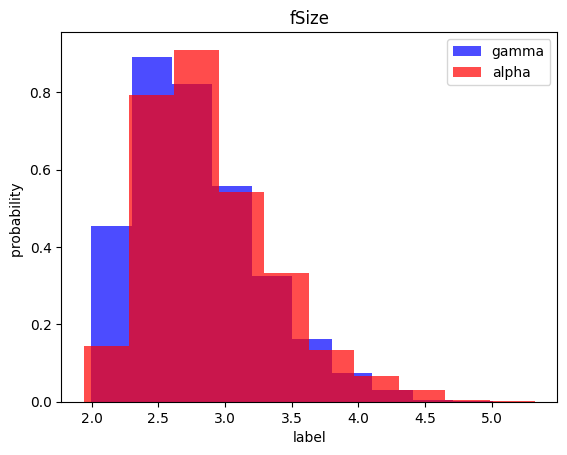

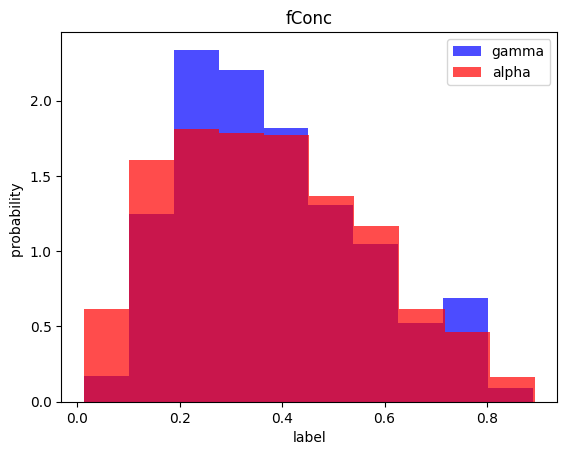

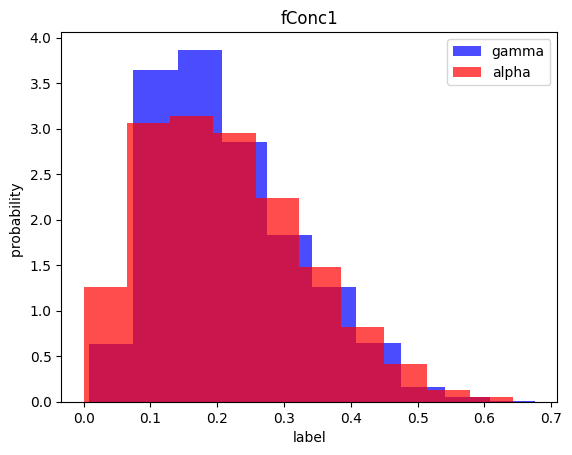

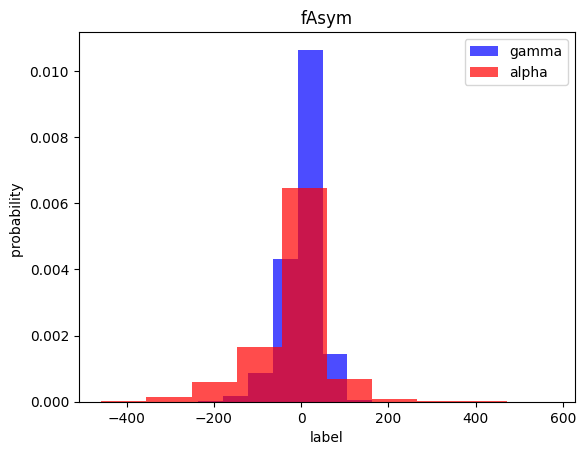

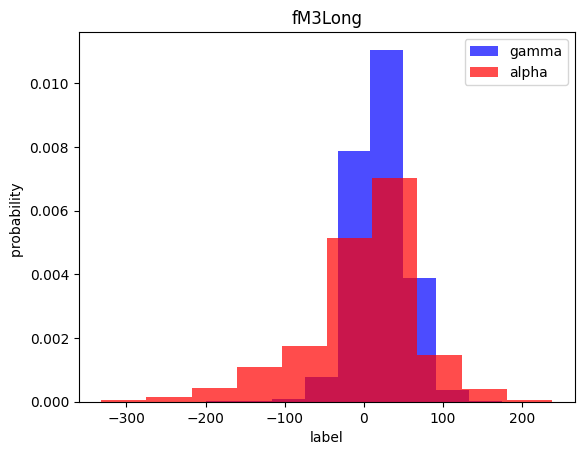

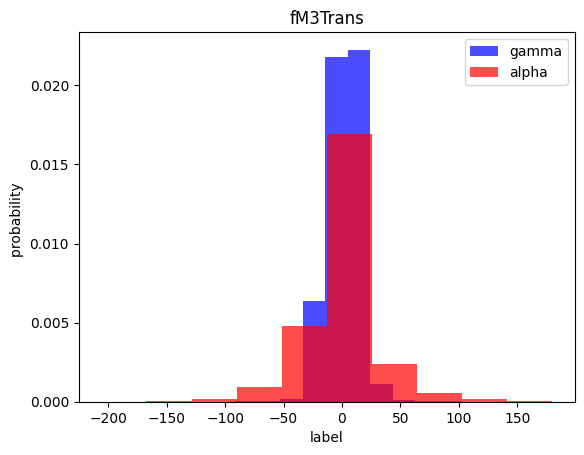

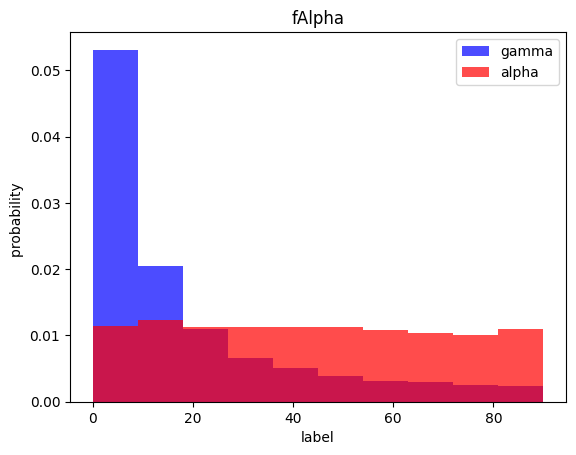

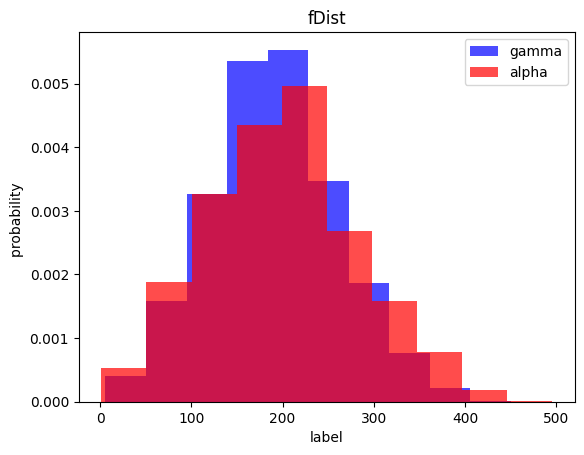

In [13]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label], color='blue',label='gamma',alpha=0.7,density=True)
  plt.hist(df[df["class"]==0][label], color='red',label='alpha',alpha=0.7,density=True)
  plt.title(label)
  plt.ylabel('probability ')
  plt.xlabel('label')
  plt.legend()
  plt.show()

#train valid test

In [14]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [15]:
#def scal_dataset(dataframe):
 # x=dataframe[dataframe.cols[:-1]].values
  #y=dataframe[dataframe.cols[-1]].values
  #scaler= StandardScaler()
 # x=scaler.fit_transform(x)
 # data=np.hstack(x,np.reshape(y,(-1,1)))
 # return data , x, y


In [16]:
print(len(train[train["class"]==1]))
print(len(train[train["class"]==0]))

7420
3992


nous remarqon que notre data nest pas equilibrez pour sela en va utlise la methode randomOversimpler from la beblioteque imblearn.over_sampling

In [17]:
def scal_dataset(dataframe,oversampl=False):
  x=dataframe[dataframe.columns[:-1]].values
  y=dataframe[dataframe.columns[-1]].values

  scaler= StandardScaler()
  x=scaler.fit_transform(x)

  if oversampl:
    ros=RandomOverSampler()
    x, y= ros.fit_resample(x,y)



  data = np.hstack([x, np.reshape(y, (-1, 1))])
  return data , x, y

In [18]:
train , x_train ,y_train = scal_dataset(train ,oversampl=True)
valid , x_valid ,y_valid = scal_dataset(valid ,oversampl=True)
test , x_test ,y_test = scal_dataset(test ,oversampl=True)

In [19]:
 print(len(y_train))
 print(len(x_train))

14840
14840


ona bien les echantion x et y train sont de meme nombre

k-nearest neighbors: cest lebremiet modele qon va aplique pour la prediction ile base sur le fait de calcule combien de cas possible depandns de k:

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [21]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [22]:
y_pred = knn_model.predict(x_test)

In [23]:
y_pred

array([0, 1, 1, ..., 0, 1, 1])

In [24]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.69      0.76      2429
           1       0.74      0.88      0.81      2429

    accuracy                           0.79      4858
   macro avg       0.80      0.79      0.78      4858
weighted avg       0.80      0.79      0.78      4858



#Naive Bayes

on va faire les meme etape mais avec la methode naive bayes

In [25]:
from sklearn.naive_bayes import GaussianNB

In [26]:
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)

GaussianNB()

In [70]:
y_pred = nb_model.predict(x_test)

In [28]:
y_pred

array([0, 1, 1, ..., 1, 0, 1])

In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.40      0.53      2429
           1       0.60      0.90      0.72      2429

    accuracy                           0.65      4858
   macro avg       0.70      0.65      0.63      4858
weighted avg       0.70      0.65      0.63      4858



#logistic regrition

> Ajouter une citation



In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(x_train, y_train)

In [32]:
y_pred=lg_model.predict(x_test)


In [33]:
y_pred

array([0, 1, 1, ..., 0, 0, 0])

In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.72      0.76      2429
           1       0.75      0.83      0.79      2429

    accuracy                           0.77      4858
   macro avg       0.78      0.77      0.77      4858
weighted avg       0.78      0.77      0.77      4858



#sort vector machines

In [35]:
from sklearn.svm import SVC

In [36]:
svm_model=SVC()
svm_model = svm_model.fit(x_train, y_train)


In [37]:
y_pred=svm_model.predict(x_test)

In [38]:
y_pred

array([0, 1, 1, ..., 0, 0, 0])

In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.79      0.83      2429
           1       0.81      0.89      0.85      2429

    accuracy                           0.84      4858
   macro avg       0.84      0.84      0.84      4858
weighted avg       0.84      0.84      0.84      4858



tous ces methode si dousous nous en donne des methode de predection


TNSRFLOW nous permet de crre nereal network

#neral network

In [46]:
import tensorflow as tf

In [66]:
def train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Input(shape=(10,)),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])
  nn_model.compile(
      optimizer=tf.keras.optimizers.Adam(lr),
      loss='binary_crossentropy',
      metrics=['accuracy']
  )
  history = nn_model.fit(
    x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
  )
  return nn_model, history


In [64]:
def plot_history(history):
  fig,(ax1, ax2)= plt.subplots(1, 2)
  ax1.plot(history.history['loss'],label='loss')
  ax1.plot(history.history['val_loss'],label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'],label='accuracy')
  ax2.plot(history.history['val_accuracy'],label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('accuracy')
  ax2.grid(True)
  plt.show()



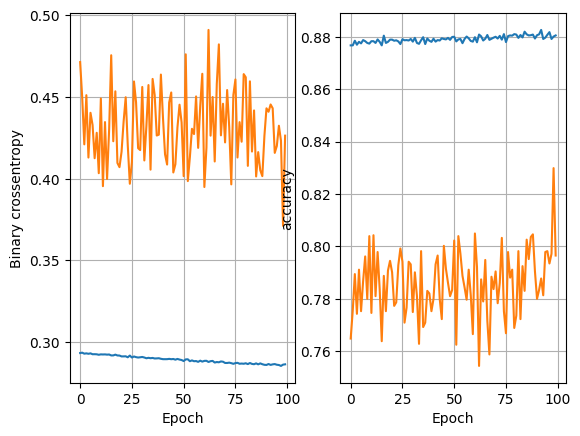

In [62]:
plot_history(history)

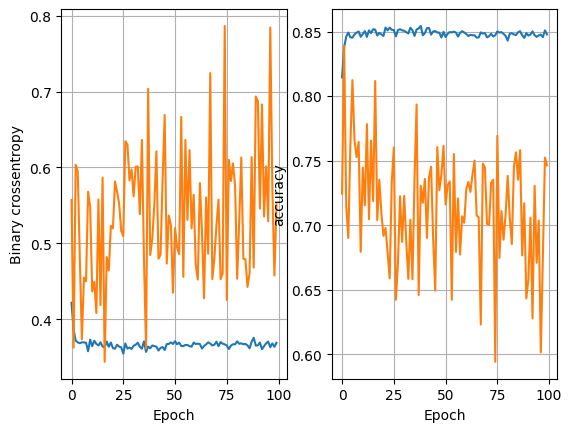

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8335 - loss: 0.4202


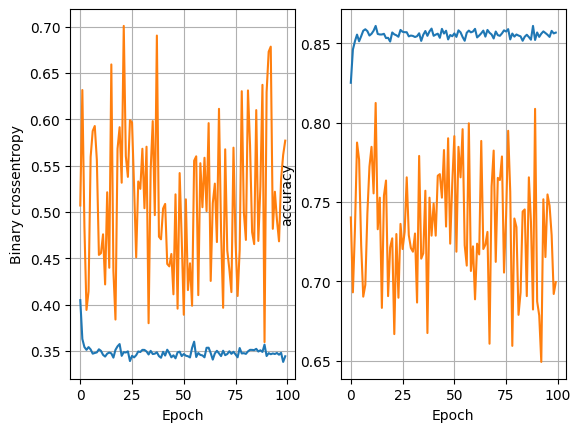

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8562 - loss: 0.3579


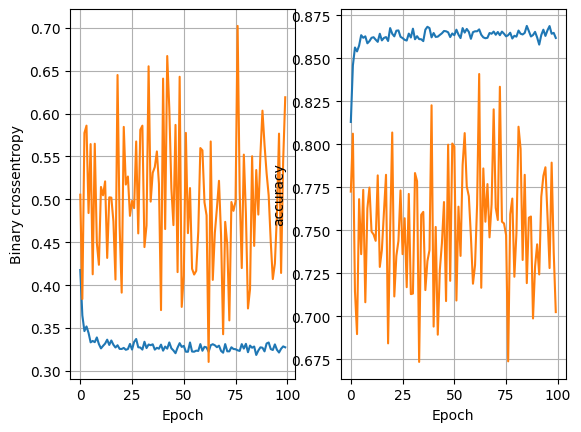

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8562 - loss: 0.3618


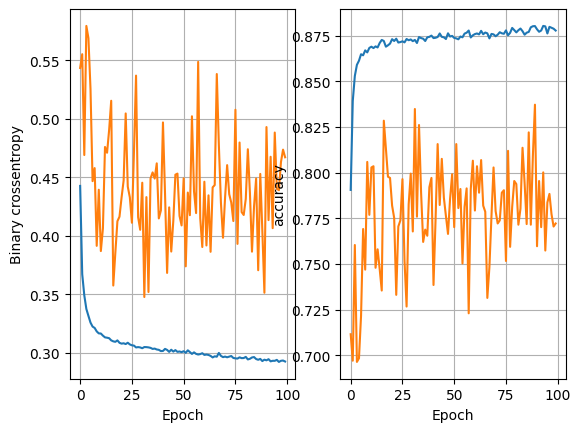

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8640 - loss: 0.3279


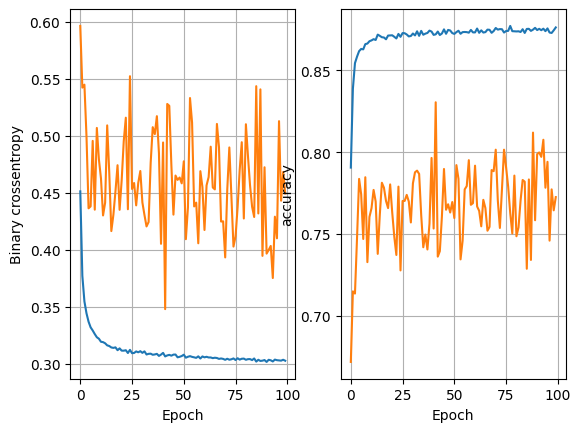

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8598 - loss: 0.3302


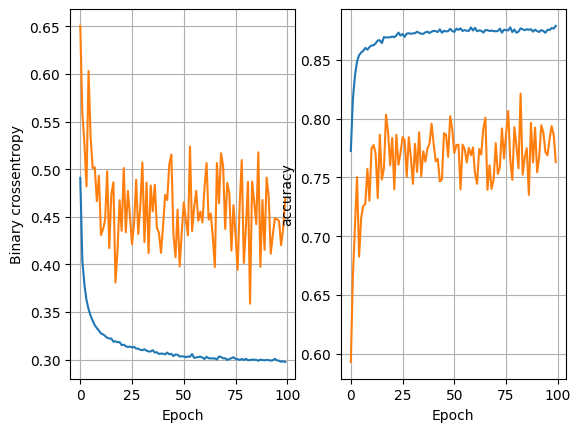

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8583 - loss: 0.3366


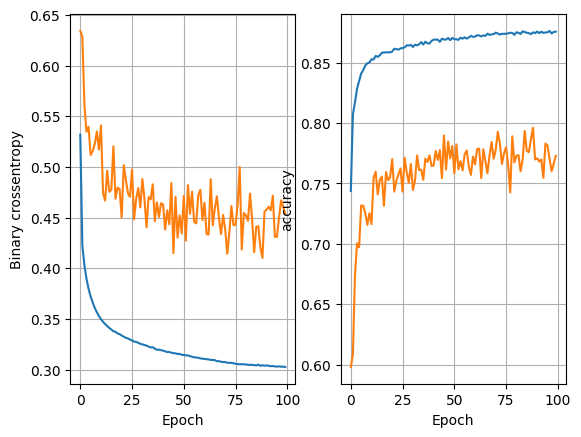

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8555 - loss: 0.3386


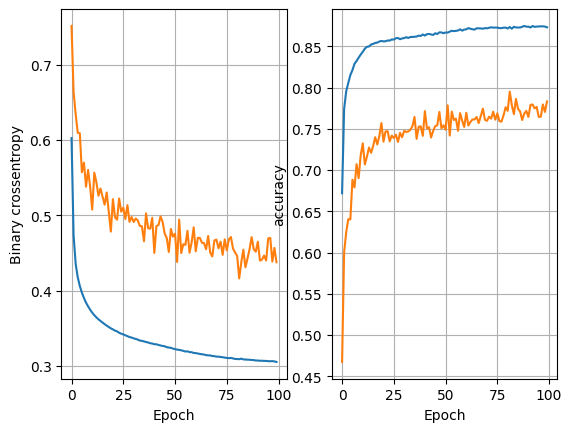

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8517 - loss: 0.3385


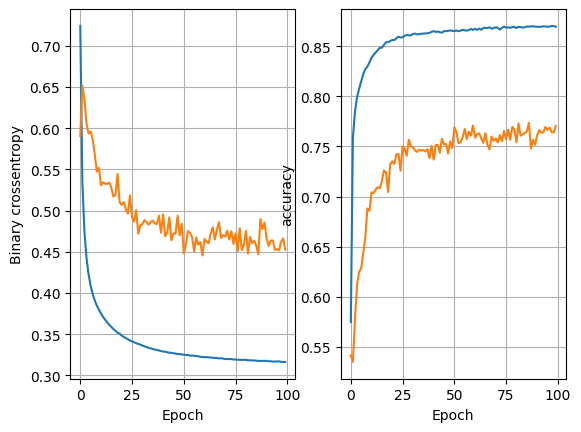

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8465 - loss: 0.3433


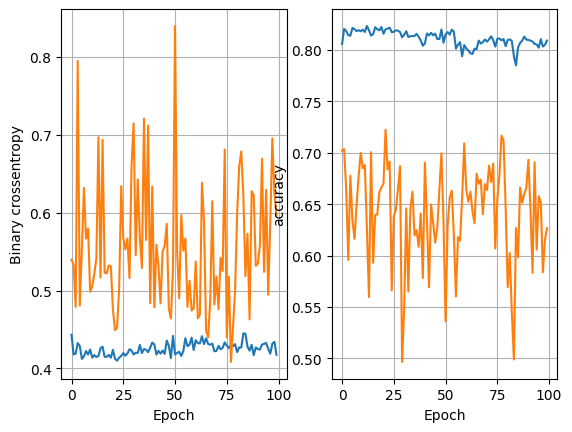

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8243 - loss: 0.3958


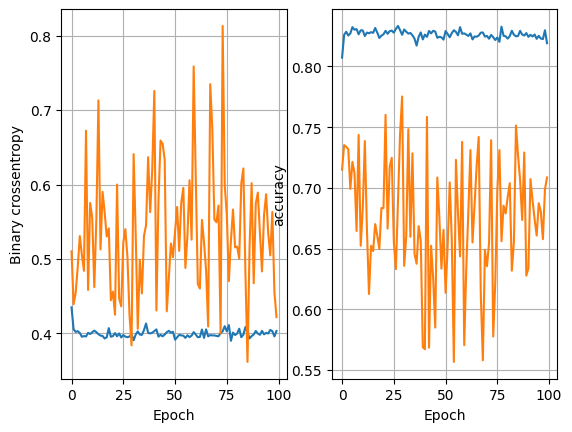

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8478 - loss: 0.3952


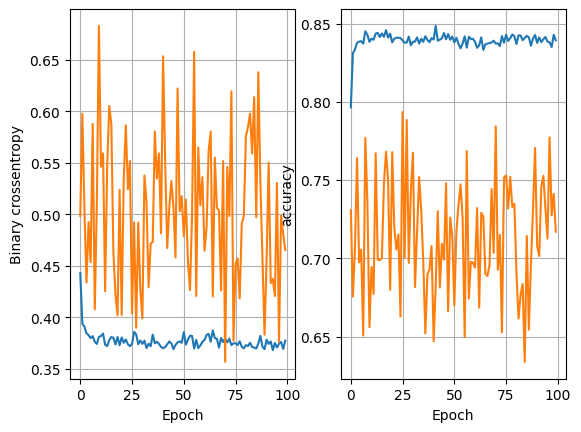

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8375 - loss: 0.3791


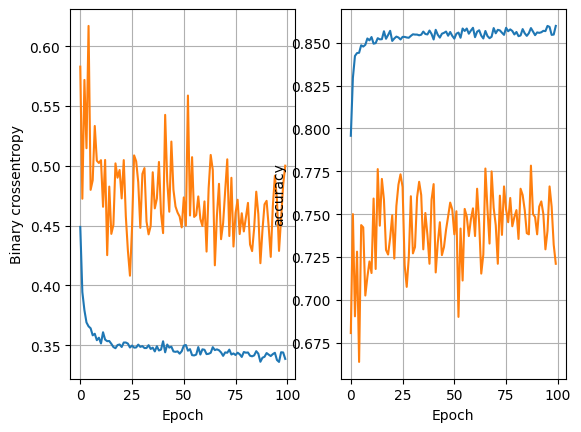

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8591 - loss: 0.3356


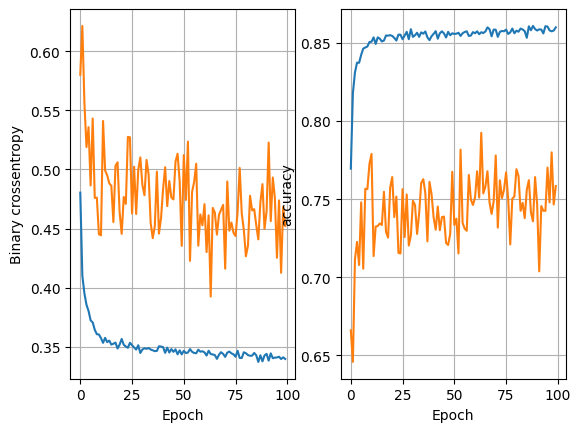

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8539 - loss: 0.3421


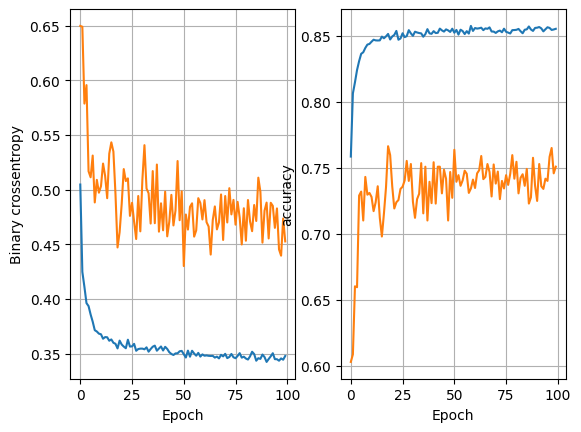

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8566 - loss: 0.3439


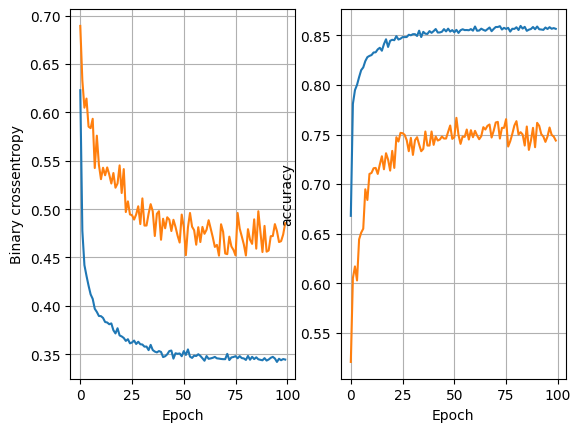

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8539 - loss: 0.3430


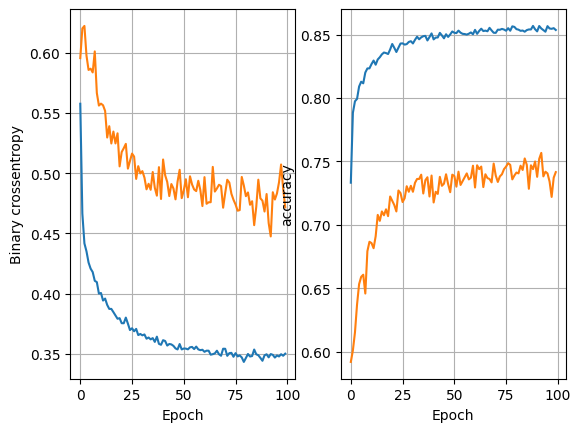

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8526 - loss: 0.3443


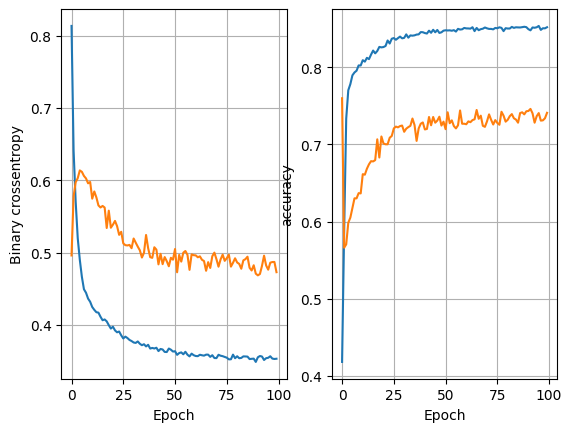

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8467 - loss: 0.3512


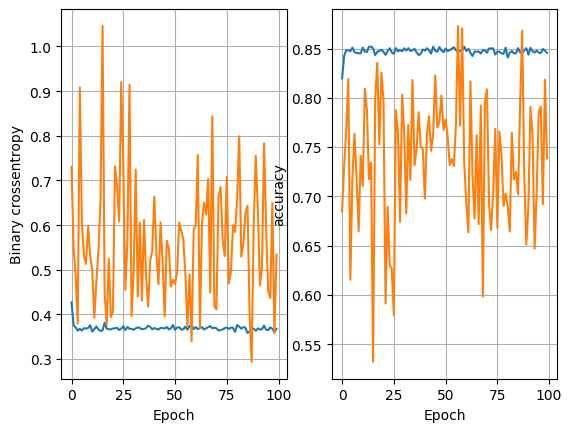

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8483 - loss: 0.3936


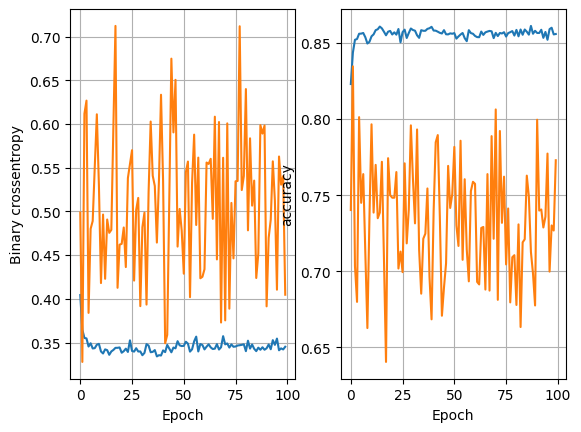

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8484 - loss: 0.3658


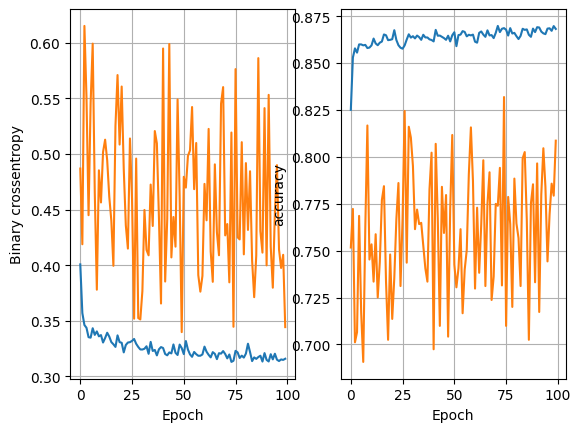

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8447 - loss: 0.3780


KeyboardInterrupt: 

In [72]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
  for dropout_prob in [0,0.2]:
    for lr in [0.1, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        model, history = train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(x_valid, y_valid)



In [73]:
y_pred = least_loss_model.predict(x_test)
y_pred = (y_pred >0.5).astype(int).reshape(-1,)
print(classification_report(y_test, y_pred))

AttributeError: 'NoneType' object has no attribute 'predict'